# DiaBite : Product Based Capstone Project
This Colab is for preprocessing datasets and making cluster for food suggestion using sklearn, pandas, numpy, and matplotlib.

## Libraries

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import gdown
import os

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import CountVectorizer

import json

## Data Gathering

### Download Dataset From Drive (Optional)

In [ ]:
os.makedirs("dataset", exist_ok=True)

In [ ]:
# download foods dataset
gdown.download_folder("https://drive.google.com/drive/folders/1l6UEQH04_Lx6mwklnnvwWHmpk2bo45p9?usp=sharing", quiet=True, use_cookies=False, output="dataset")

In [ ]:
# download file diabetes dataset
gdown.download('https://drive.google.com/file/d/1DuG0W9gF74BvXNuied2YhU1VOvZq53sS/view?usp=drive_link', output='dataset/diabetes-dataset.csv', quiet=False, fuzzy=True)

### Gather Diabetes Dataset

In [2]:
diabetes_df = pd.read_csv("dataset/diabetes-dataset.csv")
diabetes_df.columns

Index(['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

### Gather Food Dataset(s)

In [ ]:
foods_df = [
  pd.read_csv("dataset/FOOD-DATA-GROUP1.csv"),
  pd.read_csv("dataset/FOOD-DATA-GROUP2.csv"),
  pd.read_csv("dataset/FOOD-DATA-GROUP3.csv"),
  pd.read_csv("dataset/FOOD-DATA-GROUP4.csv"),
  pd.read_csv("dataset/FOOD-DATA-GROUP5.csv")
]

## Data Cleaning


### Cleaning Diabetes Dataset

In [4]:
# print dataset informations
print(diabetes_df.describe())

        Diabetes_012         HighBP       HighChol      CholCheck  \
count  253680.000000  253680.000000  253680.000000  253680.000000   
mean        0.296921       0.429001       0.424121       0.962670   
std         0.698160       0.494934       0.494210       0.189571   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       1.000000   
50%         0.000000       0.000000       0.000000       1.000000   
75%         0.000000       1.000000       1.000000       1.000000   
max         2.000000       1.000000       1.000000       1.000000   

                 BMI         Smoker         Stroke  HeartDiseaseorAttack  \
count  253680.000000  253680.000000  253680.000000         253680.000000   
mean       28.382364       0.443169       0.040571              0.094186   
std         6.608694       0.496761       0.197294              0.292087   
min        12.000000       0.000000       0.000000              0.000000  

In [5]:
#check total rows
print("total rows : ", len(diabetes_df))

total rows :  253680


In [6]:
# Check missing value(s)
missing_values = diabetes_df[['GenHlth', 'HighBP', 'BMI', 'DiffWalk', 'HighChol', 'Age', 'HeartDiseaseorAttack', 'PhysHlth', 'Stroke', 'MentHlth']].isnull().sum()
print("Missing values per column:\n", missing_values)

Missing values per column:
 GenHlth                 0
HighBP                  0
BMI                     0
DiffWalk                0
HighChol                0
Age                     0
HeartDiseaseorAttack    0
PhysHlth                0
Stroke                  0
MentHlth                0
dtype: int64


In [7]:
# handle outliers for the dataset BMI
Q1 = diabetes_df['BMI'].quantile(0.25)
Q3 = diabetes_df['BMI'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
diabetes_df_filtered = diabetes_df[~((diabetes_df['BMI'] < lower_bound) | (diabetes_df['BMI'] > upper_bound))]
# Calculate the median of the BMI
median_bmi = diabetes_df['BMI'].median()
# Replace the outliers with the median
diabetes_df['BMI'] = np.where(((diabetes_df['BMI'] < lower_bound) | (diabetes_df['BMI'] > upper_bound)), median_bmi, diabetes_df['BMI'])

print(diabetes_df.describe())

        Diabetes_012         HighBP       HighChol      CholCheck  \
count  253680.000000  253680.000000  253680.000000  253680.000000   
mean        0.296921       0.429001       0.424121       0.962670   
std         0.698160       0.494934       0.494210       0.189571   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       1.000000   
50%         0.000000       0.000000       0.000000       1.000000   
75%         0.000000       1.000000       1.000000       1.000000   
max         2.000000       1.000000       1.000000       1.000000   

                 BMI         Smoker         Stroke  HeartDiseaseorAttack  \
count  253680.000000  253680.000000  253680.000000         253680.000000   
mean       27.547386       0.443169       0.040571              0.094186   
std         4.868848       0.496761       0.197294              0.292087   
min        14.000000       0.000000       0.000000              0.000000  

### Cleaning Food Dataset(s)

In [8]:
for i, food_df in enumerate(foods_df) :
  print(food_df.describe())

       Unnamed: 0.1  Unnamed: 0  Caloric Value         Fat  Saturated Fats  \
count    551.000000  551.000000     551.000000  551.000000      551.000000   
mean     275.000000  275.000000     237.359347   10.766933        3.722715   
std      159.204271  159.204271     199.235598   12.544196        5.397021   
min        0.000000    0.000000       3.000000    0.000000        0.000000   
25%      137.500000  137.500000      94.500000    2.500000        0.500000   
50%      275.000000  275.000000     186.000000    6.600000        1.800000   
75%      412.500000  412.500000     337.000000   14.400000        4.800000   
max      550.000000  550.000000    1578.000000   87.500000       43.500000   

       Monounsaturated Fats  Polyunsaturated Fats  Carbohydrates      Sugars  \
count            551.000000            551.000000     551.000000  551.000000   
mean               4.001564              2.170793      15.819036    2.708907   
std                5.540608              3.470820      20

In [9]:
for i, food_df in enumerate(foods_df) :
  print(food_df.isnull().sum())

Unnamed: 0.1            0
Unnamed: 0              0
food                    0
Caloric Value           0
Fat                     0
Saturated Fats          0
Monounsaturated Fats    0
Polyunsaturated Fats    0
Carbohydrates           0
Sugars                  0
Protein                 0
Dietary Fiber           0
Cholesterol             0
Sodium                  0
Water                   0
Vitamin A               0
Vitamin B1              0
Vitamin B11             0
Vitamin B12             0
Vitamin B2              0
Vitamin B3              0
Vitamin B5              0
Vitamin B6              0
Vitamin C               0
Vitamin D               0
Vitamin E               0
Vitamin K               0
Calcium                 0
Copper                  0
Iron                    0
Magnesium               0
Manganese               0
Phosphorus              0
Potassium               0
Selenium                0
Zinc                    0
Nutrition Density       0
dtype: int64
Unnamed: 0.1            0

## Clustering Food Dataset(s)

### Using sklearn K-Means

In [10]:
# features used to clustering
food_indices = ['Caloric Value', 'Carbohydrates', 'Sugars', 'Dietary Fiber',
 'Saturated Fats', 'Monounsaturated Fats', 'Polyunsaturated Fats',
 'Protein', 'Vitamin D', 'Magnesium', 'Potassium']

In [11]:
# making scaler of the data
scaler = StandardScaler()
foods_scaled = [scaler.fit_transform(food_df[food_indices]) for food_df in foods_df]

In [12]:
# making PCA for each food dataset
pca = PCA(n_components=2)
foods_pca = [pca.fit_transform(food_scaled) for food_scaled in foods_scaled]

for i, food_df in enumerate(foods_df) :
  foods_df[i]['PCA1'] = foods_pca[i][:, 0]
  foods_df[i]['PCA2'] = foods_pca[i][:, 1]

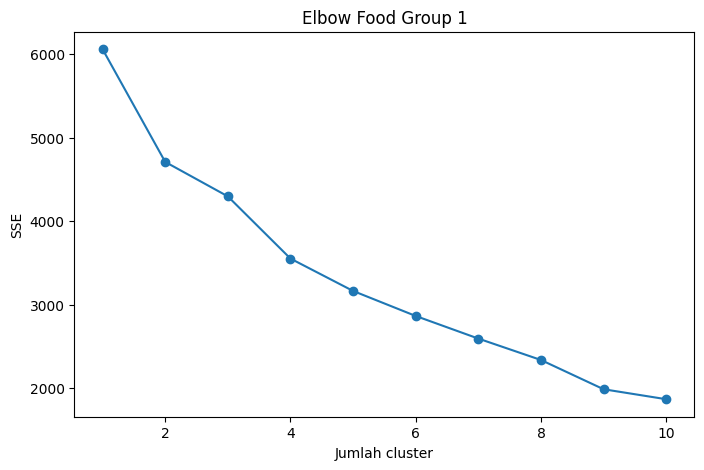

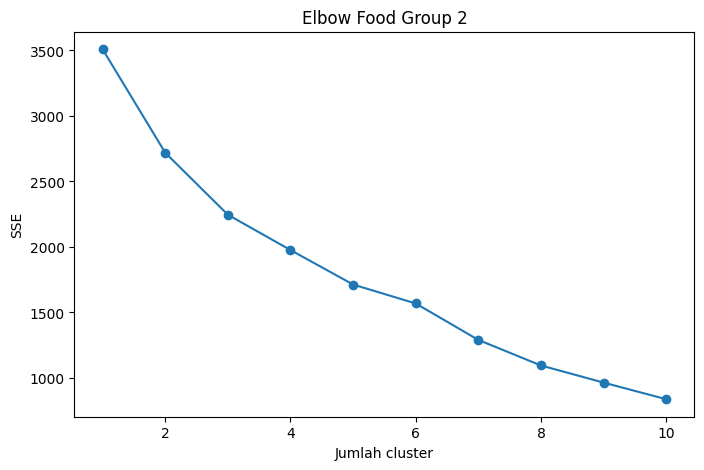

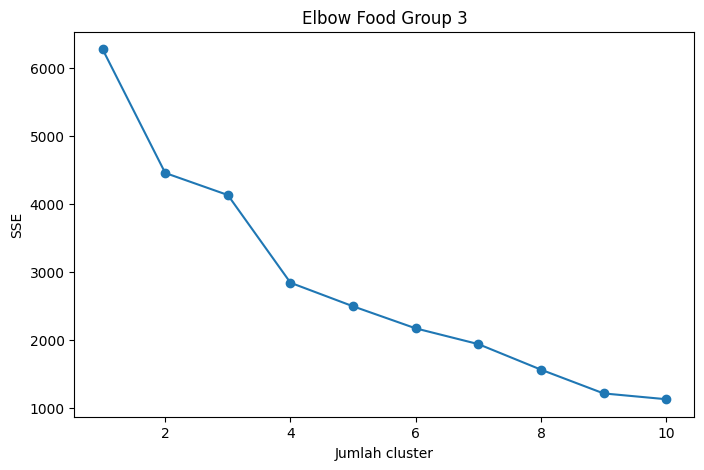

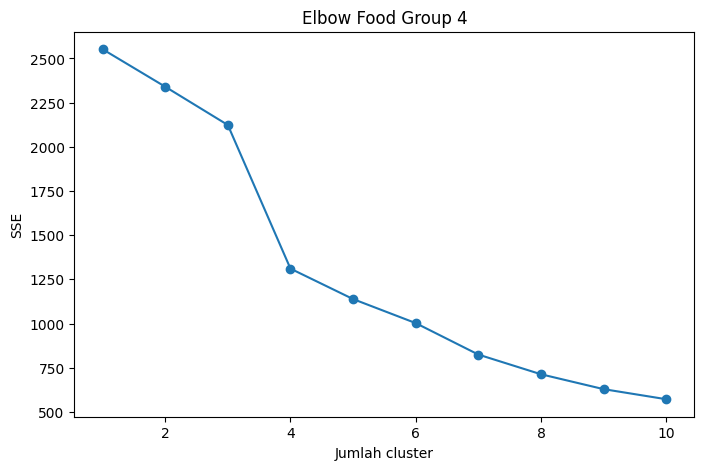

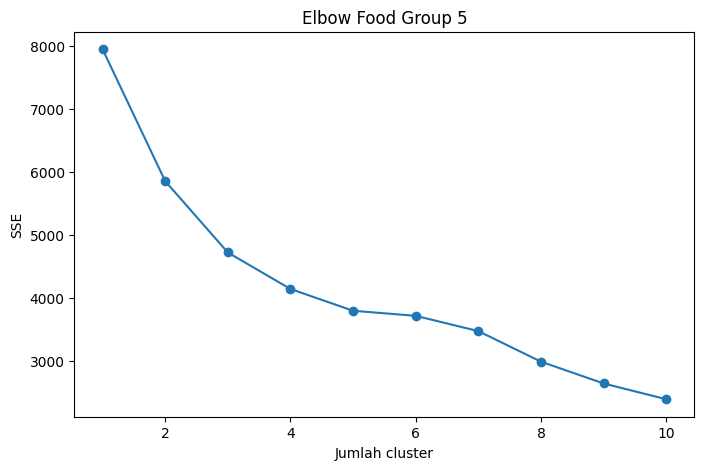

In [13]:
# Elbow
sses = []

for food_scaled in foods_scaled:
  sse = []
  for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(food_scaled)
    sse.append(kmeans.inertia_)
    # print(sse)

  sses.append(sse)

# print(sses)

for i, sse in enumerate(sses) :
  plt.figure(figsize=(8, 5))
  plt.plot(range(1, 11), sse, marker='o')
  plt.xlabel('Jumlah cluster')
  plt.ylabel('SSE')
  plt.title(f'Elbow Food Group {i+1}')
  plt.show()

In [14]:
# 3 cluster : baik, aman, jangan
optimal_k = 3

for i, food_scaled in enumerate(foods_scaled) :
  kmeans = KMeans(n_clusters=optimal_k, random_state=42)
  kmeans.fit(food_scaled)
  foods_df[i]['Cluster'] = kmeans.labels_

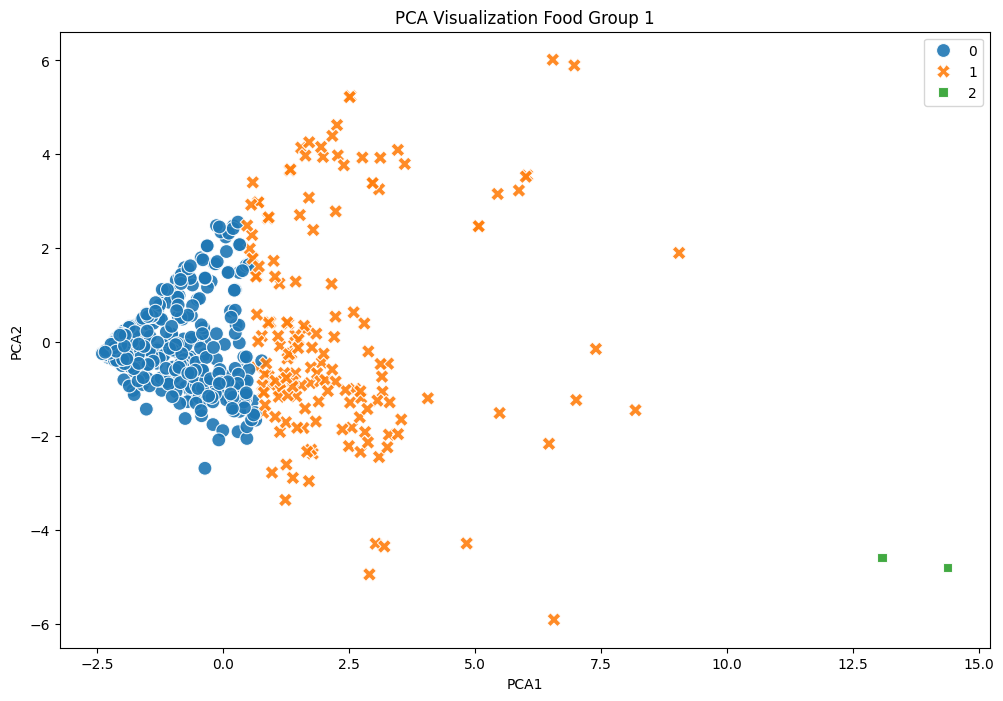

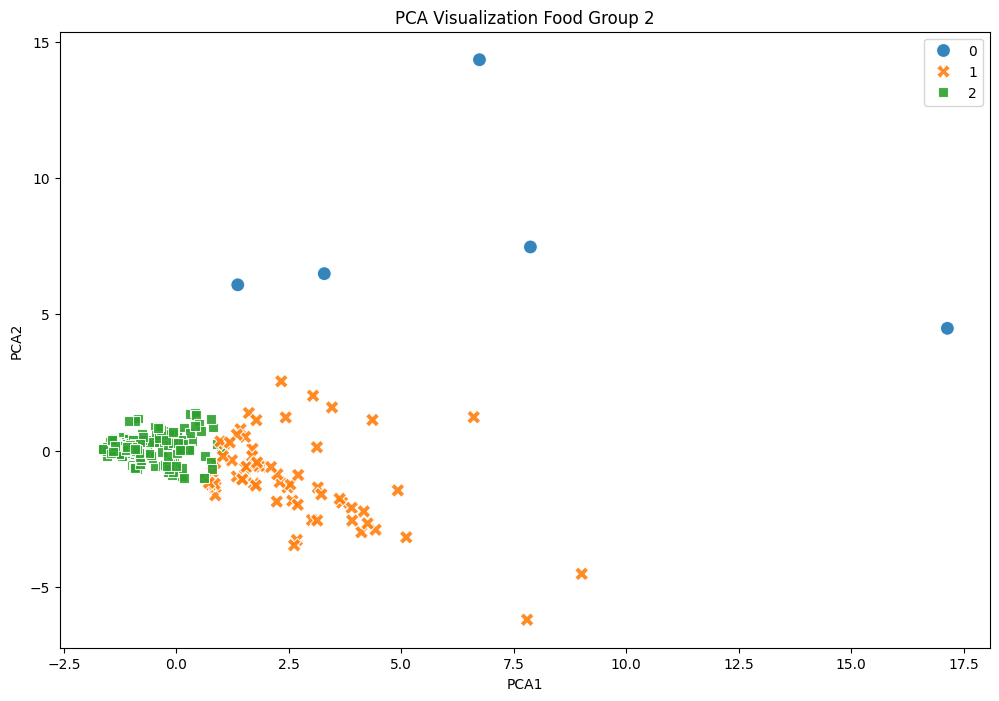

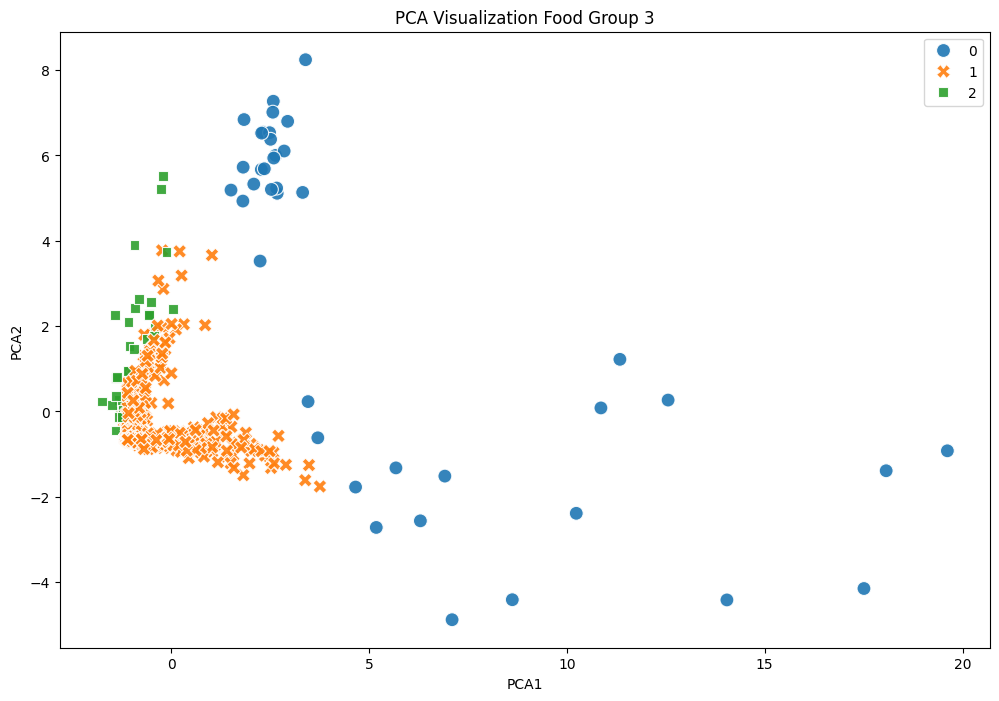

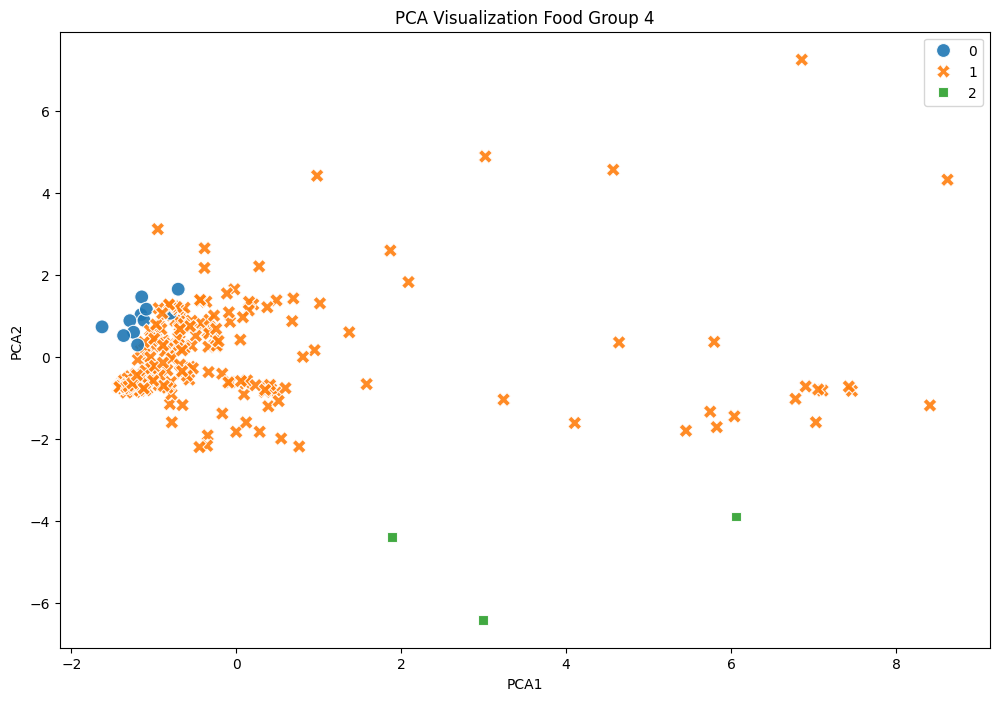

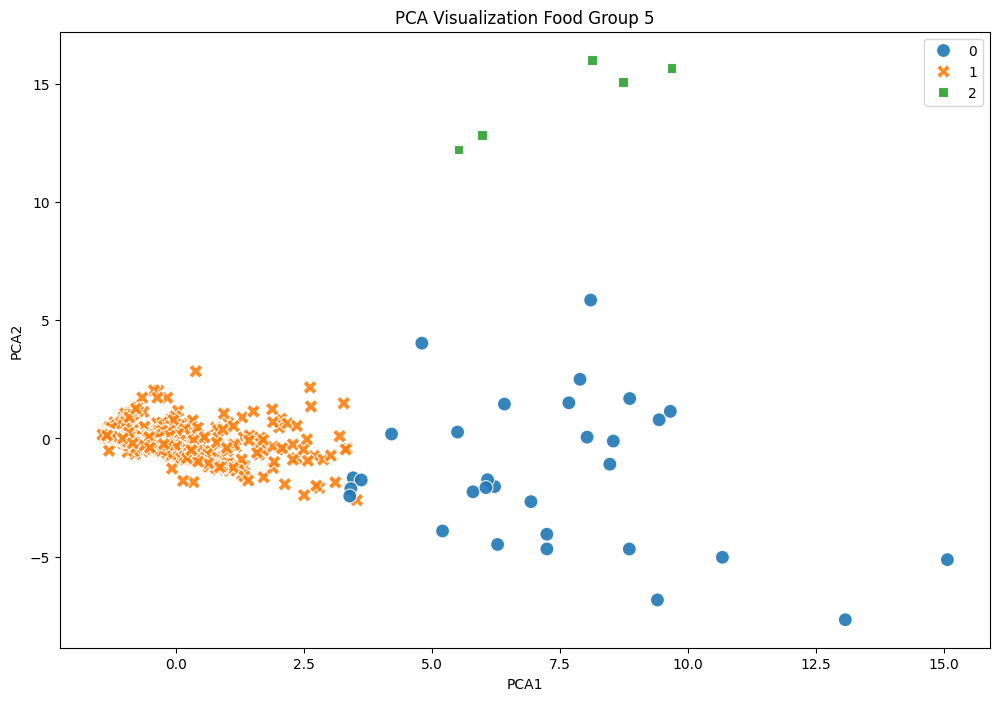

In [15]:
for i, food_df in enumerate(foods_df) :
  plt.figure(figsize=(12, 8))
  sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=food_df, palette='tab10', alpha=0.9, s=100, style='Cluster')

  plt.title(f'PCA Visualization Food Group {i+1}')
  plt.legend(loc='best')
  plt.show()

   Caloric Value  Carbohydrates    Sugars  Dietary Fiber  Saturated Fats  \
0       2.360970       2.916899  0.891566       2.643906        0.336234   
1      -0.167223      -0.126835 -0.037422      -0.115153       -0.090502   
2       8.305022      -0.682984 -0.393417      -0.593165       10.332184   

   Monounsaturated Fats  Polyunsaturated Fats   Protein  Vitamin D  Magnesium  \
0              1.127121              1.426198  2.796750  -0.229865   3.532484   
1             -0.108375             -0.109242 -0.122441   0.012063  -0.156333   
2              7.880948              6.145551 -0.540951  -0.229865  -0.452522   

   Potassium  Cluster  
0   3.211698        0  
1  -0.141707        1  
2  -0.470358        2  


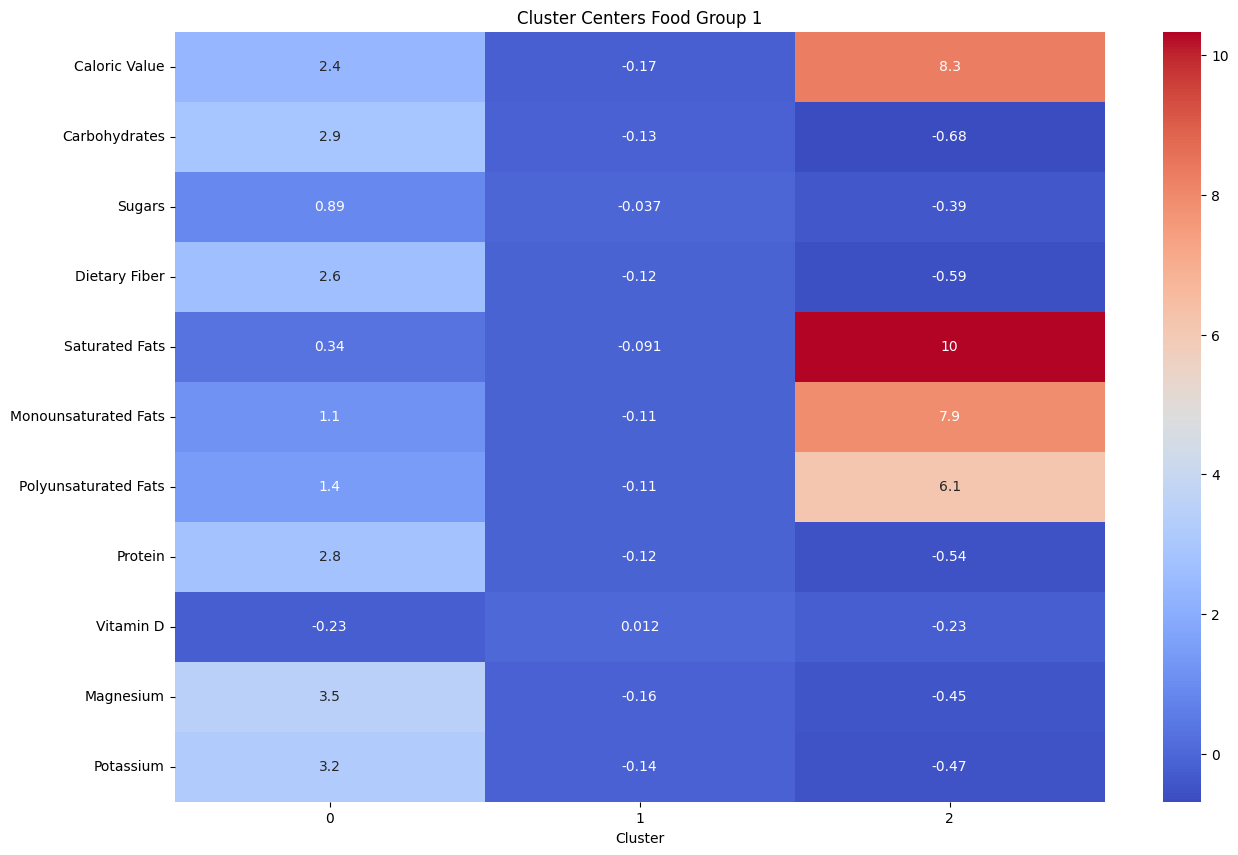

   Caloric Value  Carbohydrates    Sugars  Dietary Fiber  Saturated Fats  \
0       2.360970       2.916899  0.891566       2.643906        0.336234   
1      -0.167223      -0.126835 -0.037422      -0.115153       -0.090502   
2       8.305022      -0.682984 -0.393417      -0.593165       10.332184   

   Monounsaturated Fats  Polyunsaturated Fats   Protein  Vitamin D  Magnesium  \
0              1.127121              1.426198  2.796750  -0.229865   3.532484   
1             -0.108375             -0.109242 -0.122441   0.012063  -0.156333   
2              7.880948              6.145551 -0.540951  -0.229865  -0.452522   

   Potassium  Cluster  
0   3.211698        0  
1  -0.141707        1  
2  -0.470358        2  


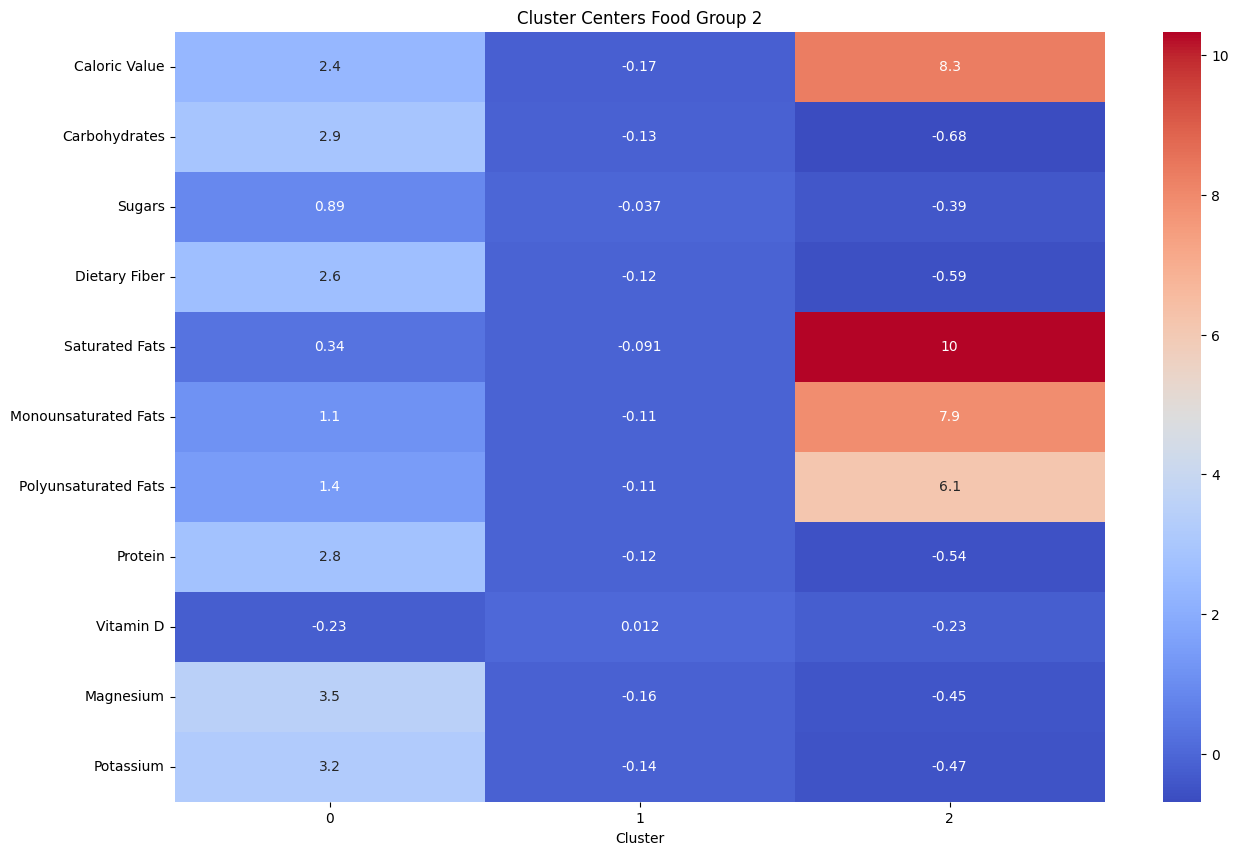

   Caloric Value  Carbohydrates    Sugars  Dietary Fiber  Saturated Fats  \
0       2.360970       2.916899  0.891566       2.643906        0.336234   
1      -0.167223      -0.126835 -0.037422      -0.115153       -0.090502   
2       8.305022      -0.682984 -0.393417      -0.593165       10.332184   

   Monounsaturated Fats  Polyunsaturated Fats   Protein  Vitamin D  Magnesium  \
0              1.127121              1.426198  2.796750  -0.229865   3.532484   
1             -0.108375             -0.109242 -0.122441   0.012063  -0.156333   
2              7.880948              6.145551 -0.540951  -0.229865  -0.452522   

   Potassium  Cluster  
0   3.211698        0  
1  -0.141707        1  
2  -0.470358        2  


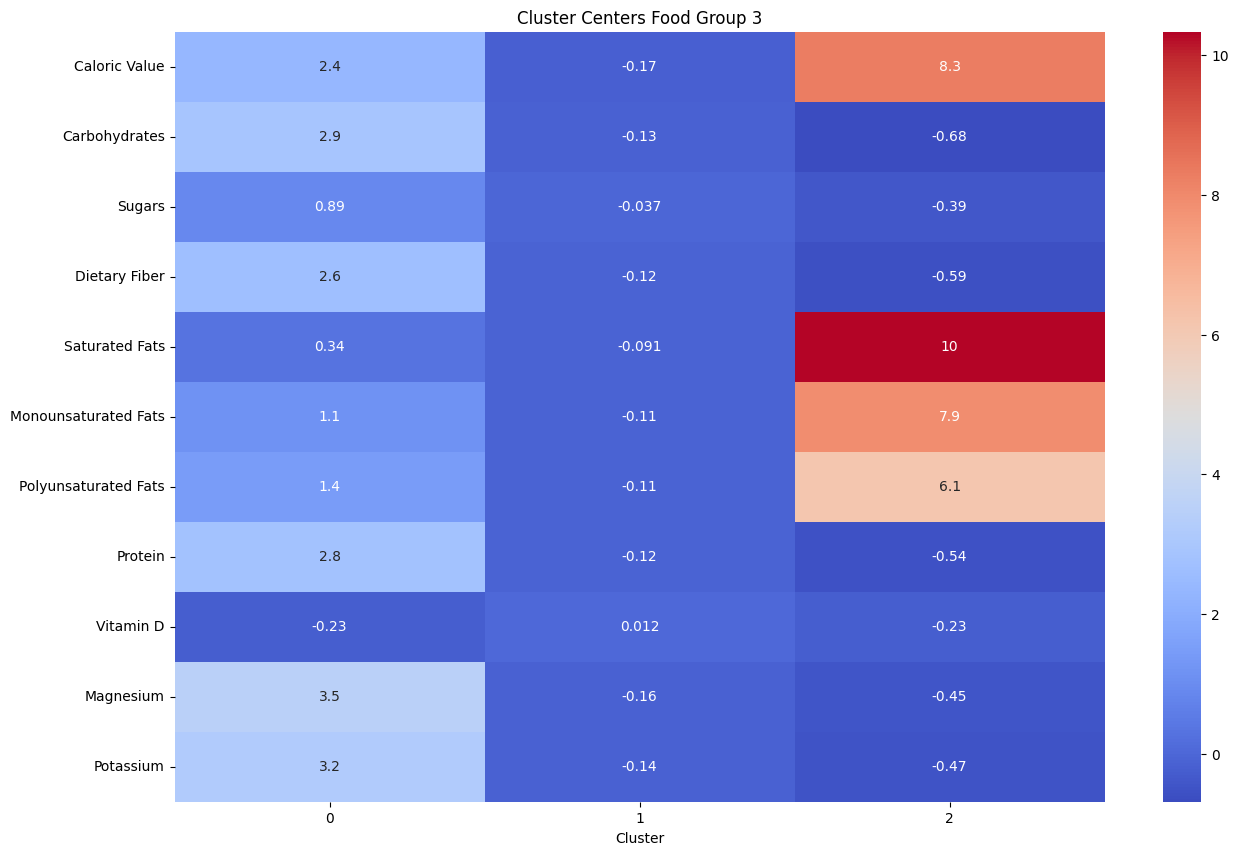

   Caloric Value  Carbohydrates    Sugars  Dietary Fiber  Saturated Fats  \
0       2.360970       2.916899  0.891566       2.643906        0.336234   
1      -0.167223      -0.126835 -0.037422      -0.115153       -0.090502   
2       8.305022      -0.682984 -0.393417      -0.593165       10.332184   

   Monounsaturated Fats  Polyunsaturated Fats   Protein  Vitamin D  Magnesium  \
0              1.127121              1.426198  2.796750  -0.229865   3.532484   
1             -0.108375             -0.109242 -0.122441   0.012063  -0.156333   
2              7.880948              6.145551 -0.540951  -0.229865  -0.452522   

   Potassium  Cluster  
0   3.211698        0  
1  -0.141707        1  
2  -0.470358        2  


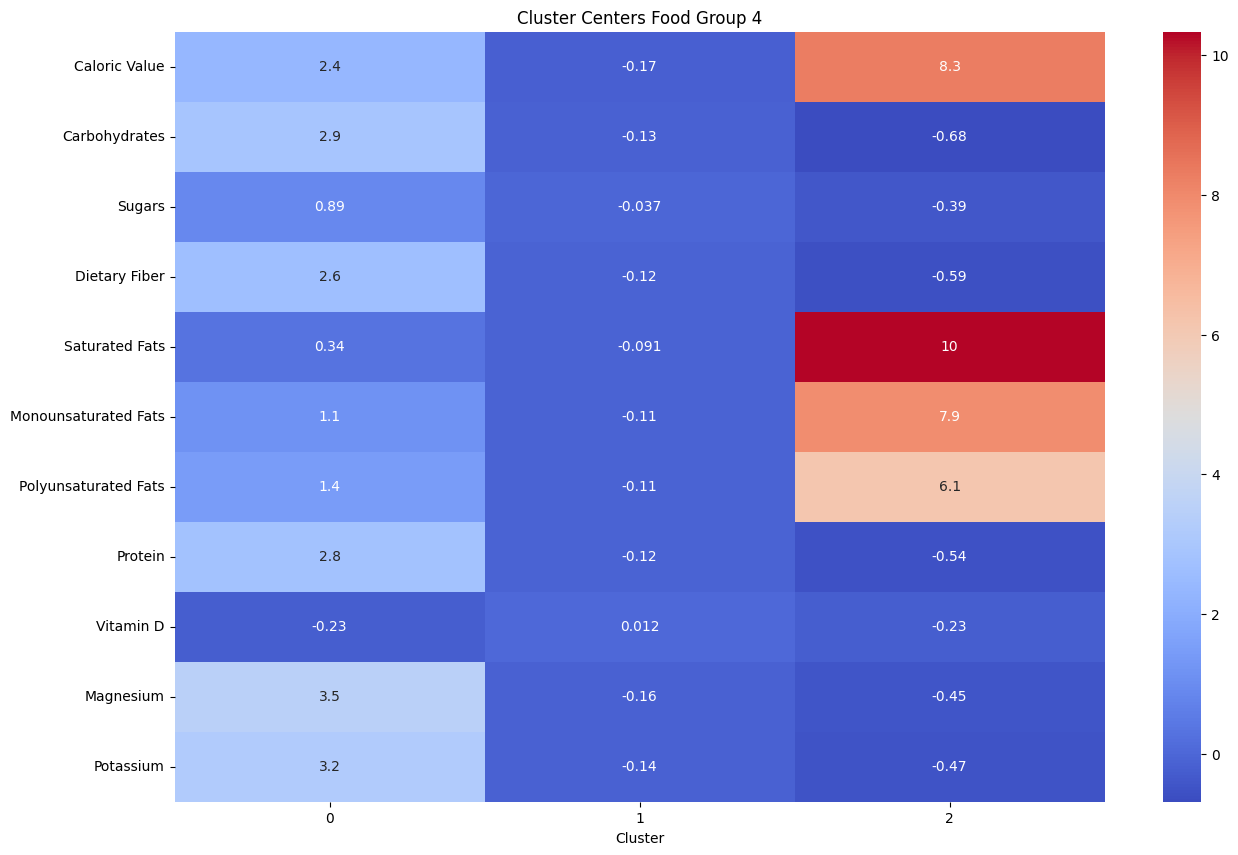

   Caloric Value  Carbohydrates    Sugars  Dietary Fiber  Saturated Fats  \
0       2.360970       2.916899  0.891566       2.643906        0.336234   
1      -0.167223      -0.126835 -0.037422      -0.115153       -0.090502   
2       8.305022      -0.682984 -0.393417      -0.593165       10.332184   

   Monounsaturated Fats  Polyunsaturated Fats   Protein  Vitamin D  Magnesium  \
0              1.127121              1.426198  2.796750  -0.229865   3.532484   
1             -0.108375             -0.109242 -0.122441   0.012063  -0.156333   
2              7.880948              6.145551 -0.540951  -0.229865  -0.452522   

   Potassium  Cluster  
0   3.211698        0  
1  -0.141707        1  
2  -0.470358        2  


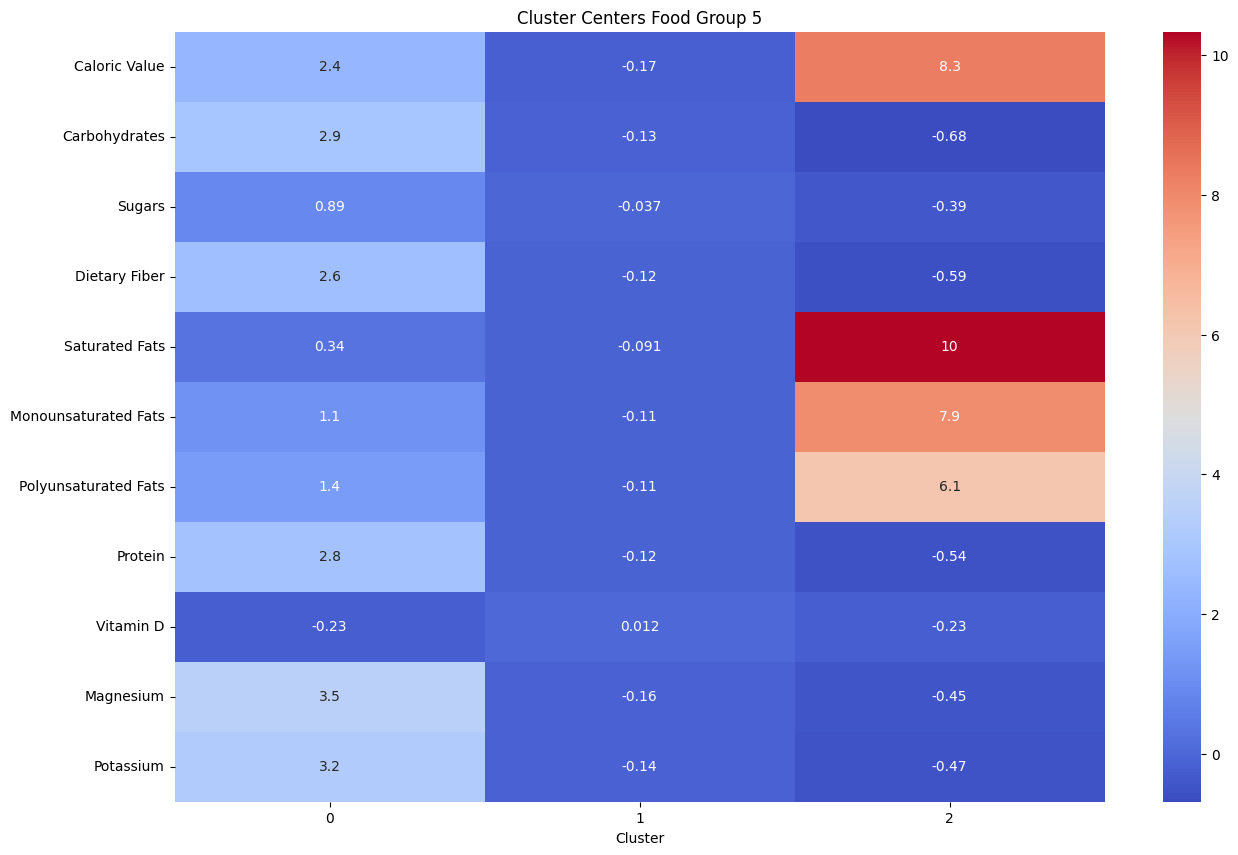

In [16]:
for i, food_scaled in enumerate(foods_scaled) :
  scaler = StandardScaler()
  scaler.fit(food_scaled)

  cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
  cluster_df = pd.DataFrame(cluster_centers, columns=food_indices)
  cluster_df['Cluster'] = range(optimal_k)

  print(cluster_df)

  fig, ax = plt.subplots(figsize=(15, 10))
  sns.heatmap(cluster_df.set_index('Cluster').T, annot=True, cmap='coolwarm', ax=ax)
  plt.title(f'Cluster Centers Food Group {i+1}')
  plt.show()

In [17]:
print("List of cluster 0")
for i, food_df in enumerate(foods_df) :
  print(f"\nFood Group {i+1}")
  print(food_df[food_df['Cluster'] == 0]['food'].head(10))

List of cluster 0

Food Group 1
0                        cream cheese
1                   neufchatel cheese
2    requeijao cremoso light catupiry
3                      ricotta cheese
4                cream cheese low fat
5               cream cheese fat free
6                      gruyere cheese
7                      cheddar cheese
8                     parmesan cheese
9                       romano cheese
Name: food, dtype: object

Food Group 2
71                vanilla frosting
156               banana cream pie
225      chaptti roti indian bread
230              weetabix weetabix
264    honey cereali general mills
Name: food, dtype: object

Food Group 3
129     coconut whole coconut
139              coconut meat
209          french beans raw
215            pink beans raw
216            navy beans raw
225           pinto beans raw
226    black turtle beans raw
227            fava beans raw
229        hyacinth beans raw
230           white beans raw
Name: food, dtype: object

Food G

In [18]:
print("List of cluster 1")
for i, food_df in enumerate(foods_df) :
  print(f"\nFood Group {i+1}")
  print(food_df[food_df['Cluster'] == 1]['food'].head(10))

List of cluster 1

Food Group 1
11      port salut cheese
17         gjetost cheese
21         asadero cheese
25    queso blanco cheese
29       chihuahua cheese
31        muenster cheese
32    queso fresco cheese
34         pimento cheese
38       provolone cheese
39           anejo cheese
Name: food, dtype: object

Food Group 2
43      dessert wine dry
55        egg substitute
65    white frosting dry
74     pineapple topping
81          almond paste
83       popover dry mix
89          millet flour
90       triticale flour
91      corn flour white
92      rice flour brown
Name: food, dtype: object

Food Group 3
0              nectarine
1         kiwifruit gold
2       prickly pear raw
5       muscadine grapes
6     heidelbeeren jutro
7          prunes stewed
8              tangerine
9                 prunes
10            lemon peel
12           raspberries
Name: food, dtype: object

Food Group 4
0      chocolate pudding fat free
1                 tapioca pudding
2        tapioca pud

In [19]:
print("List of cluster 2")
for i, food_df in enumerate(foods_df) :
  print(f"\nFood Group {i+1}")
  print(food_df[food_df['Cluster'] == 2]['food'].head(10))

List of cluster 2

Food Group 1
83            lemon chicken
153    general tsos chicken
Name: food, dtype: object

Food Group 2
0                  eggnog
1              beer light
2          beer budweiser
3     weizenbier erdinger
4    beer light budweiser
5                    beer
6               root beer
7        whiskey sour mix
8            whiskey sour
9         tequila sunrise
Name: food, dtype: object

Food Group 3
3                        pineapple
4                            rowan
11                          banana
15                 kiwifruit green
18                          orange
31           yellow plantain fried
35                     pomegranate
40    fruit walnut salad mcdonalds
41                      grapefruit
42              japanese persimmon
Name: food, dtype: object

Food Group 4
30                     gushers fruit gushers
47     caramel med iced coffee dunkin donuts
150                          pili nuts dried
Name: food, dtype: object

Food Group 5
3     m

### Save The Clustered Data

In [20]:
foods_df

[     Unnamed: 0.1  Unnamed: 0                              food  \
 0               0           0                      cream cheese   
 1               1           1                 neufchatel cheese   
 2               2           2  requeijao cremoso light catupiry   
 3               3           3                    ricotta cheese   
 4               4           4              cream cheese low fat   
 ..            ...         ...                               ...   
 546           546         546             chinook salmon smoked   
 547           547         547                      cisco smoked   
 548           548         548                    haddock smoked   
 549           549         549                  whitefish smoked   
 550           550         550  red salmon sockeye filets smoked   
 
      Caloric Value   Fat  Saturated Fats  Monounsaturated Fats  \
 0               51   5.0           2.900                 1.300   
 1              215  19.4          10.900       

In [21]:
# making clusters data
cluster_0 = foods_df[0][foods_df[0]["Cluster"] == 0]
cluster_1 = foods_df[0][foods_df[0]["Cluster"] == 1]
cluster_2 = foods_df[0][foods_df[0]["Cluster"] == 2]

for i in range(1, len(foods_df)) :
  cluster_0 = pd.concat([cluster_0, foods_df[i][foods_df[i]["Cluster"] == 0]])
  cluster_1 = pd.concat([cluster_1, foods_df[i][foods_df[i]["Cluster"] == 1]])
  cluster_2 = pd.concat([cluster_2, foods_df[i][foods_df[i]["Cluster"] == 2]])

In [22]:
# print the data
cluster_2

,Unnamed: 0.1,Unnamed: 0,food,Caloric Value,Fat,Saturated Fats,Monounsaturated Fats,Polyunsaturated Fats,Carbohydrates,Sugars,...,Magnesium,Manganese,Phosphorus,Potassium,Selenium,Zinc,Nutrition Density,PCA1,PCA2,Cluster
83,83,83,lemon chicken,1440,74.9,12.2,16.4,36.7,122.0,55.2,...,95.6,0.600,821.7,987.4,0.001,3.200,545.212,13.080736,-4.586928,2
153,153,153,general tsos chicken,1578,87.5,14.8,20.8,40.1,128.3,62.1,...,96.3,0.400,679.5,1075.4,0.065,7.000,368.673,14.382384,-4.801946,2
0,0,0,eggnog,224,10.6,6.6,3.3,0.5,20.4,20.4,...,48.3,0.024,276.9,419.1,0.094,1.200,377.200,0.628540,-0.198311,2
1,1,1,beer light,96,0.0,0.0,0.0,0.0,5.4,0.3,...,16.5,0.094,39.6,69.3,0.077,0.044,19.456,-1.250220,-0.035398,2
2,2,2,beer budweiser,12,0.0,0.0,0.0,0.0,0.9,0.0,...,2.1,0.038,3.8,9.7,0.000,0.000,2.200,-1.600770,0.046546,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3,3,3,menhaden fish oil,1966,218.0,66.3,58.2,74.5,0.0,0.0,...,0.0,0.000,0.0,0.0,0.000,0.000,218.000,8.734451,15.081684,2
19,19,19,nutmeg butter oil,1927,218.0,196.2,10.5,0.0,0.0,0.0,...,0.0,0.000,0.0,0.0,0.000,0.000,218.000,5.521384,12.231345,2
32,32,32,sheanut oil,1927,218.0,101.6,95.9,11.3,0.0,0.0,...,0.0,0.000,0.0,0.0,0.000,0.000,218.000,8.118942,16.030529,2
37,37,37,babassu oil,1927,218.0,177.0,24.9,3.5,0.0,0.0,...,0.0,0.000,0.0,0.0,0.000,0.000,218.000,5.977379,12.827834,2


In [23]:
# clean some features
cluster_0.drop(columns=['Cluster', 'Unnamed: 0.1', 'Unnamed: 0', 'PCA1', 'PCA2'], inplace=True)
cluster_1.drop(columns=['Cluster', 'Unnamed: 0.1', 'Unnamed: 0', 'PCA1', 'PCA2'], inplace=True)
cluster_2.drop(columns=['Cluster', 'Unnamed: 0.1', 'Unnamed: 0', 'PCA1', 'PCA2'], inplace=True)

In [24]:
# save the cluster data
os.makedirs("clustered_food", exist_ok=True)

cluster_0.to_csv("clustered_food/cluster_0.csv", index=False)
cluster_1.to_csv("clustered_food/cluster_1.csv", index=False)
cluster_2.to_csv("clustered_food/cluster_2.csv", index=False)

In [25]:
# Optional
os.makedirs("clustered_food/raw", exist_ok=True)

for i, food_df in enumerate(foods_df):
    food_df.to_csv(f"clustered_food/raw/food_group_{i+1}.csv", index=False)

In [ ]:
# Optional
!zip -r clustered_food.zip clustered_food

'7z' is not recognized as an internal or external command,
operable program or batch file.


## Finalization

### Extract Tags of Food Cluster

In [4]:
directory = 'clustered_food'

# List to hold the dataframes
dataframes = []

# Iterate over all the files in the directory
for filename in os.listdir('clustered_food'):
    if filename.startswith("cluster") and filename.endswith(".csv"):
        file_path = os.path.join(directory, filename)
        # Read the CSV file and append to the list
        df = pd.read_csv(file_path)
        dataframes.append(df)

# Concatenate all dataframes in the list
combined_df = pd.concat(dataframes, ignore_index=True)

In [4]:
# get all food name
combined_food = " ".join([i for i in combined_df.food.to_list()])

In [ ]:
# split all word in food name
food_tags = [i for i in combined_food.split(" ") if i != "with" or i != "in" or i != "on" or i != "side" or i != "eyed" or i != "dish"]

# change the data to set, to prevent duplicate word
food_tags = set(food_tags)

In [9]:
food_tags

NameError: name 'food_tags' is not defined

In [ ]:
len(food_tags)

1417

In [ ]:
class SetEncoder(json.JSONEncoder):
    def default(self, obj):
        if isinstance(obj, set):
            return list(obj)
        return json.JSONEncoder.default(self, obj)

data_tags = json.dumps(food_tags, cls=SetEncoder)
print(data_tags)

["puffs", "almond", "salad", "filet", "cherimoya", "creamy", "adzuki", "stinging", "yuca", "horseradish", "tequila", "eyed", "proteins", "aspartame", "smoked", "tamarind", "eas", "tomatoseed", "paprika", "hummus", "caviar", "side", "brittle", "walnut", "blue", "vida", "stock", "pretzels", "empanada", "boiled", "cola", "pounder", "caffeine", "coho", "in", "kamut", "vanille", "syntha", "epazote", "muscat", "savoy", "canola", "rutabaga", "marinara", "nonfat", "yokan", "flaxseeds", "frankfurters", "brain", "di", "cantaloupe", "ostrich", "plate", "abbott", "shellie", "unpopped", "tilsit", "crab", "brussels", "paste", "bartlett", "pizza", "jicama", "sweetened", "lemons", "queso", "cottonseed", "beets", "lamp", "kind", "natto", "sunflower", "calorie", "catupiry", "mini", "hungarian", "own", "lamb", "spleen", "cranberries", "yam", "rib", "toastbrot", "hash", "soup", "napa", "walnuts", "jr", "gratin", "chanterelle", "brisket", "caribou", "chrysanthemum", "souffle", "mamey", "tasty", "russet", "

In [ ]:
with open('food_tags.json', 'w') as f:
    json.dump(data_tags, f)

### Get Top 250

In [5]:
vector_tags = CountVectorizer(max_features=250)

vector_tags.fit_transform(combined_df.food)

top_250_tags = vector_tags.get_feature_names_out()

top_250_tags

array(['acorn', 'almond', 'almonds', 'amaranth', 'american', 'and',
       'apple', 'apricot', 'arroz', 'asparagus', 'bacon', 'bagel',
       'baked', 'banana', 'bar', 'barbecue', 'bean', 'beans', 'beef',
       'beer', 'biscuit', 'black', 'blade', 'blue', 'bologna', 'bran',
       'bread', 'breast', 'broth', 'brown', 'burger', 'burrito', 'butter',
       'cabbage', 'caesar', 'cake', 'canned', 'carrots', 'cereal',
       'cheese', 'chestnuts', 'chicken', 'chili', 'chinese', 'chips',
       'chocolate', 'chops', 'chuck', 'cinnamon', 'coated', 'coca',
       'coconut', 'coffee', 'cola', 'con', 'cooked', 'cookies', 'corn',
       'cottage', 'cowpeas', 'crab', 'crackers', 'cranberry', 'cream',
       'crispy', 'dinner', 'donut', 'dressing', 'dried', 'drumstick',
       'dry', 'duck', 'egg', 'english', 'eye', 'fat', 'fish', 'flavored',
       'flour', 'free', 'french', 'fresh', 'fried', 'fries', 'frosting',
       'fruit', 'fudge', 'germ', 'granola', 'grape', 'grapefruit',
       'gravy', '

In [9]:
with open('top_250_tags.json', 'w') as f:
    json.dump(list(top_250_tags), f)